<a href="https://colab.research.google.com/github/chantikanr/andat-uas/blob/main/3333210100_Chantika_Nuramalia_Kelas_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**IMPORT LIBRARY***

The library we used for forecasting is pandas, numpy, matplotlib, seaborn, math, date time.
1. library pandas is frequently used for analysis data.
2. library numpy is library that provides support for arrays and math operations
3. matplotlib is the library that contains pyplo that are loaded from Matplotlib library for visualization graphics.
4. seaborn used to extend Matplotlib's visualization capabilities with more attractive layouts and additional statistical capabilities.
5. math is math module which provides basis math functions.
6. date time is module date time that used for work with date and time object
7. the last is %matplotlib inline that used for to ensure that the resulting plots are displayed directly on the notebook page.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**IMPORT DATASET**

Dataset source : https://www.kaggle.com/datasets/hananxx/gamestop-historical-stock-prices?resource=download



GameStop Corp. is an American video game, consumer electronics, and gaming merchandise retailer. GameStop's stocks have spiked in recent days since the Reddit group blew up the stock price. Now GameStop is up more than 1,700% since the start of January. so it is interesting to try to predict the stock prices in the next months and see how prediction and time series models will perform in this case. This Dataset is a daily historical stock price of GameStop from February 2002 (the year it was listed) to January 2021.

First of all, you have to upload the dataset that you want to use to google drive. Then, copy the link addres.

After that, you have to call the command **!gdown** for downloading the file from google drive.

In [ ]:
# https://drive.google.com/file/d/1YGBDadHQY_ZHwl6g_HxI89Mlxa4WrhVr/view?usp=drive_link

!gdown 1YGBDadHQY_ZHwl6g_HxI89Mlxa4WrhVr

Downloading...
From: https://drive.google.com/uc?id=1YGBDadHQY_ZHwl6g_HxI89Mlxa4WrhVr
To: /content/GME_stock.csv
100% 520k/520k [00:00<00:00, 185MB/s]


For the variable train_data, used pd.read_csv from pandas library for read the csv file with name GME_stock.csv that will convert to dataframe object.
train_data.head() used for showing the first five rows from the dataframe.

In [ ]:
train_data = pd.read_csv('GME_stock.csv')
train_data.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


After executing the above syntax, the resulting data is open price data, high price data, close price data, volume, and adjclose price.
Open price data means the price that was opened on that day and close price data means the price that was closed on that day. For the volume data is meaning total transactions on that day.

**CHECK MISSING VALUES**

To checking missing values, use this syntax

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4773 non-null   object 
 1   open_price      4773 non-null   float64
 2   high_price      4773 non-null   float64
 3   low_price       4773 non-null   float64
 4   close_price     4773 non-null   float64
 5   volume          4773 non-null   float64
 6   adjclose_price  4773 non-null   float64
dtypes: float64(6), object(1)
memory usage: 261.1+ KB


After obtaining the above results it is known that there are no missing values, it can be seen from the same non-null count

CHECK STATISTICS VALUES FOR EVERY FEATURES

Use this syntax for checking statistics values for every features

In [ ]:
train_data.describe()

,open_price,high_price,low_price,close_price,volume,adjclose_price
count,4773.000000,4773.000000,4773.000000,4773.000000,4.773000e+03,4773.000000
mean,23.201005,23.693590,22.714309,23.193234,3.398255e+06,16.882897
std,14.695884,16.210219,13.628194,14.513893,6.547035e+06,11.019953
min,2.850000,2.940000,2.570000,2.800000,6.500000e+04,2.555174
25%,11.360000,11.575000,11.130000,11.350000,1.528900e+06,9.607993
50%,21.760000,22.110001,21.430000,21.760000,2.491800e+06,15.479172
75%,29.420000,30.170000,28.719999,29.430000,3.791600e+06,22.205433
max,354.829987,483.000000,249.000000,347.510010,1.967843e+08,347.510010


The code train_data.describe() computes descriptive statistics of the DataFrame train_data.

The describe() function provides a summary of the descriptive statistics for each numerical column in the DataFrame.

Handle datetime data for time series

Use this syntax for handle datetime data for time serie

In [ ]:
train_data['date'] = pd.to_datetime(train_data['date'])
train_data.set_index('date', inplace=True)
train_data.head()

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


train_data['date'] = pd.to_datetime(train_data['date']) in this syntax is used to convert the 'date' feature into date time so that it becomes one format. By performing this conversion, the 'date' column will have the appropriate data type for representing dates and times.

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

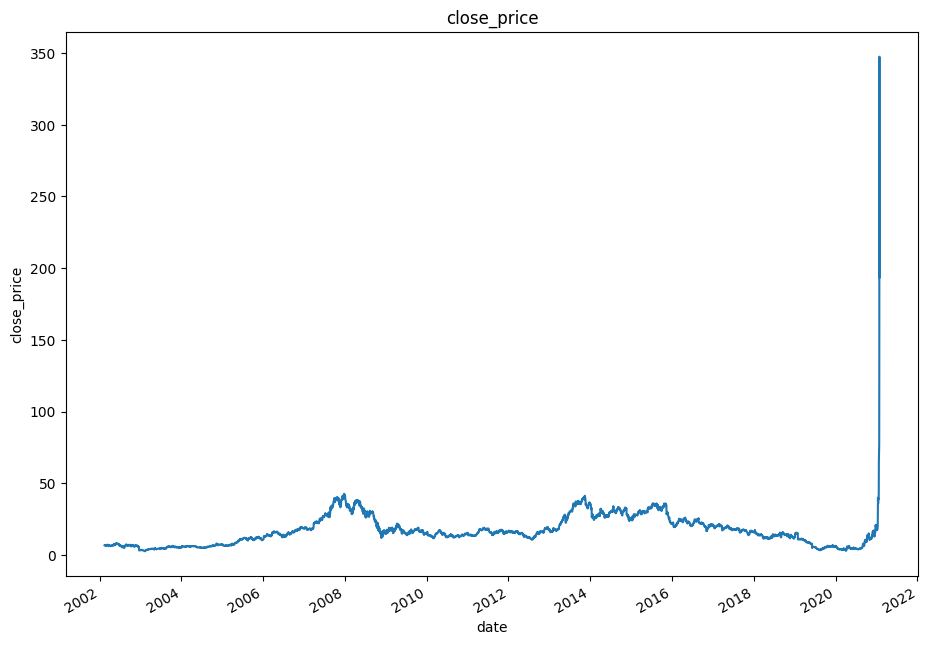

In [ ]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['adjclose_price'].plot()
plt.title('close_price') # adding a title
plt.xlabel('date') # x label
plt.ylabel('close_price') # y label
plt.show()

The chart above displays data for the last 10 years when prices have closed. It is known that these stocks experience an up and down trend but have an increasing trend in 2020-2022

<Figure size 1600x800 with 0 Axes>

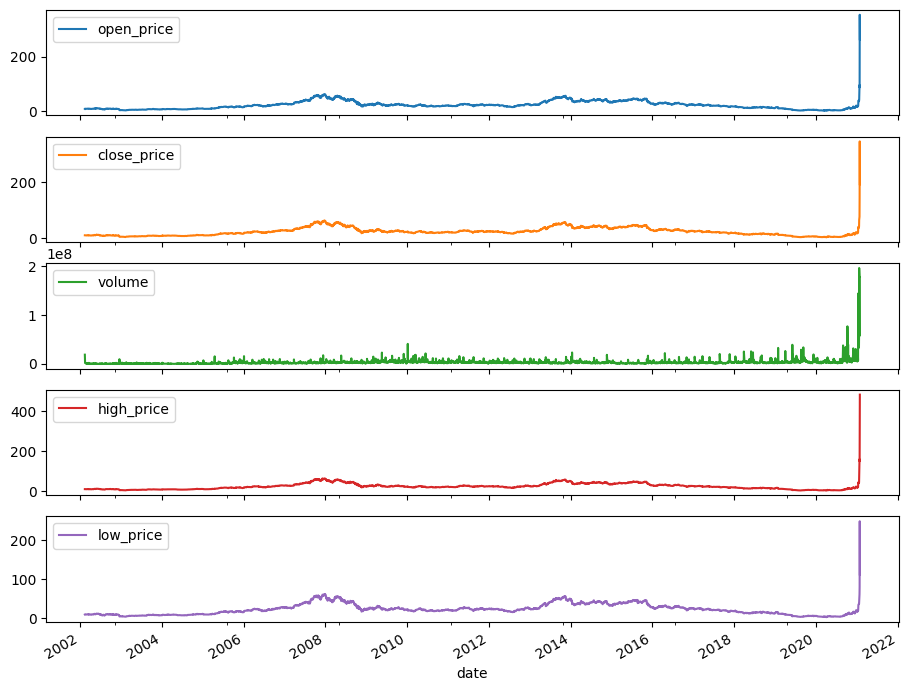

In [ ]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['open_price', 'close_price', 'volume', 'high_price', 'low_price']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

After doing a plot with the indicators open;close;volume;high;low price above, it is known that each indicator has an up and down trend

Use this syntax to read the high price, low price, close price, open price data.

In [ ]:
train_data['HL_PCT'] = (train_data['high_price'] - train_data['low_price']) / train_data['low_price'] * 100.0
train_data['PCT_change'] = (train_data['close_price'] - train_data['open_price']) / train_data['open_price'] * 100.0

These calculations aim to provide additional insights into the price volatility and percentage change in price for each entry in the train_data DataFrame. The 'HL_PCT' column represents the percentage change in price volatility, while the 'PCT_change' column represents the percentage change in price over the specified period.

In [ ]:
df = train_data[['HL_PCT', 'PCT_change', 'adjclose_price','volume']]

The code df = train_data[['HL_PCT', 'PCT_change', 'adjclose_price','volume']] selects specific columns from the DataFrame train_data and assigns them to a new DataFrame called df.

In this code, the double square brackets [['HL_PCT', 'PCT_change', 'adjclose_price','volume']] are used to create a subset of columns from the original DataFrame train_data. The columns included in the subset are 'HL_PCT', 'PCT_change', 'adjclose_price', and 'volume'.

By assigning the selected columns to the new DataFrame df, you create a new DataFrame that contains only the specified columns. This can be useful when you want to focus on a subset of columns for further analysis or visualization.

In [ ]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['adjclose_price'].shift(-forecast_out)

239


<ipython-input-11-be397b0bdaea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['adjclose_price'].shift(-forecast_out)


The code snippet you provided is in Python and involves forecasting and creating a new column in the DataFrame df.

forecast_out = int(math.ceil(0.05 * len(df))): This line calculates the forecast out period by taking 5% of the length of the DataFrame df and rounding it up to the nearest whole number. The math.ceil() function is used to round up the result.

print(forecast_out): This line prints the value of forecast_out, which represents the forecast out period.


The adjclose price will be made into the label.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

The code snippet imports various modules and classes from scikit-learn that are commonly used for preprocessing, regression modeling, ensemble methods, support vector regression, data splitting, and performance evaluation in machine learning tasks.

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [ ]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-13-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


The above code snippet creates a StandardScaler object, extracts the feature columns from the DataFrame df, fits the scaler to the data to calculate the mean and standard deviation, and then applies feature scaling to the data. Feature scaling is important in machine learning to ensure that all features are on a similar scale and have similar variances, which can improve the performance and convergence of certain models.

In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

X_Predictions = X[-forecast_out:]: This line selects the last forecast_out number of rows from the feature data X and assigns it to the variable X_Predictions. These data points represent the portion of the dataset that will be used for prediction.

X = X[:-forecast_out]: This line selects all the rows from the feature data X except for the last forecast_out number of rows. The remaining data points are assigned back to the variable X. These data points represent the portion of the dataset that will be used for training the model.

By splitting the feature data into X and X_Predictions, the code prepares the dataset for training and prediction tasks. The training data (X) will be used to train the machine learning model, while the prediction data (X_Predictions) will be used to make predictions with the trained model. This separation is essential to evaluate the model's performance on unseen data and assess its ability to generalize to new observations.

In [ ]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-15-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


df.dropna(inplace=True): This line removes any rows from the DataFrame df that contain missing values. The dropna() method with inplace=True modifies the DataFrame directly by removing the rows with missing values.

y = np.array(df['label']): This line extracts the target variable values from the DataFrame df and assigns them to the variable y. The target variable is typically the variable that you want to predict or model. In this case, it seems that the 'label' column in df contains the target variable values. The np.array() function converts the 'label' column to a NumPy array.

By dropping the rows with missing values using dropna(), the code ensures that the dataset does not contain any missing values before proceeding with modeling. Additionally, by extracting the target variable values into the variable y, it sets up the target variable for use in the machine learning modeling process.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): This line splits the feature data X and the target variable y into four separate sets: X_train, X_test, y_train, and y_test.

X_train and y_train represent the feature and target data for training the machine learning model.
X_test and y_test represent the feature and target data for evaluating the model's performance on unseen data.
The train_test_split function randomly shuffles and splits the data into training and testing sets. The test_size parameter specifies the proportion of the data that should be allocated to the testing set, in this case, 20% (0.2) of the data. The random_state parameter is used to set a seed value for random number generation, ensuring reproducibility of the same train-test split.

By splitting the data into training and testing sets, the code allows for training the model on a portion of the data and evaluating its performance on the remaining unseen data. This is a common practice in machine learning to assess the model's ability to generalize and make predictions on new, unseen observations.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

lr = LinearRegression(): This line creates an instance of the LinearRegression class from scikit-learn, which represents a linear regression model.

lr.fit(X_train, y_train): This line fits the linear regression model to the training data. The fit() method is used to train the model by finding the optimal coefficients that minimize the sum of squared residuals between the predicted and actual target values.

lr_confidence = lr.score(X_test, y_test): This line calculates the coefficient of determination (R^2 score) of the linear regression model on the testing data. The score() method is used to evaluate the model's performance by comparing the predicted target values (X_test) to the actual target values (y_test). The R^2 score measures the proportion of the variance in the target variable that can be explained by the model. The resulting score is assigned to the variable lr_confidence.

In summary, the code fits a linear regression model to the training data using X_train and y_train, and then calculates the R^2 score of the model on the testing data using X_test and y_test. The R^2 score indicates how well the linear regression model fits the testing data, with a higher score indicating a better fit.

In [ ]:
lr_confidence

0.3410948314947275

The term "lr_confidence" is not a standard term in scikit-learn or commonly used in the context of linear regression. However, based on the code snippet you provided, "lr_confidence" likely refers to the coefficient of determination (R^2 score) of the linear regression model on the testing data.

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

rf = RandomForestRegressor(): This line creates an instance of the RandomForestRegressor class from scikit-learn, which represents a random forest regression model.

rf.fit(X_train, y_train): This line fits the random forest regression model to the training data. The fit() method is used to train the model by constructing an ensemble of decision trees based on random subsets of the training data.

rf_confidence = rf.score(X_test, y_test): This line calculates the coefficient of determination (R^2 score) of the random forest regression model on the testing data. The score() method is used to evaluate the model's performance by comparing the predicted target values (X_test) to the actual target values (y_test). The R^2 score measures the proportion of the variance in the target variable that can be explained by the model. The resulting score is assigned to the variable rf_confidence.

In summary, the code fits a random forest regression model to the training data using X_train and y_train, and then calculates the R^2 score of the model on the testing data using X_test and y_test. The R^2 score provides an indication of how well the random forest model fits the testing data, with a higher score indicating a better fit.

In [ ]:
rf_confidence

0.6595188274473096

The term "rf_confidence" is not a standard term in scikit-learn or commonly used in the context of random forest regression. However, based on the code snippet you provided, "rf_confidence" likely refers to the coefficient of determination (R^2 score) of the random forest regression model on the testing data.

In [ ]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-21-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-21-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-21-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

In summary, the code generates future forecasts by using the random forest regression model to predict values for the future feature data. These predicted values are then added to the DataFrame df as a new row, where the index represents the corresponding future date.

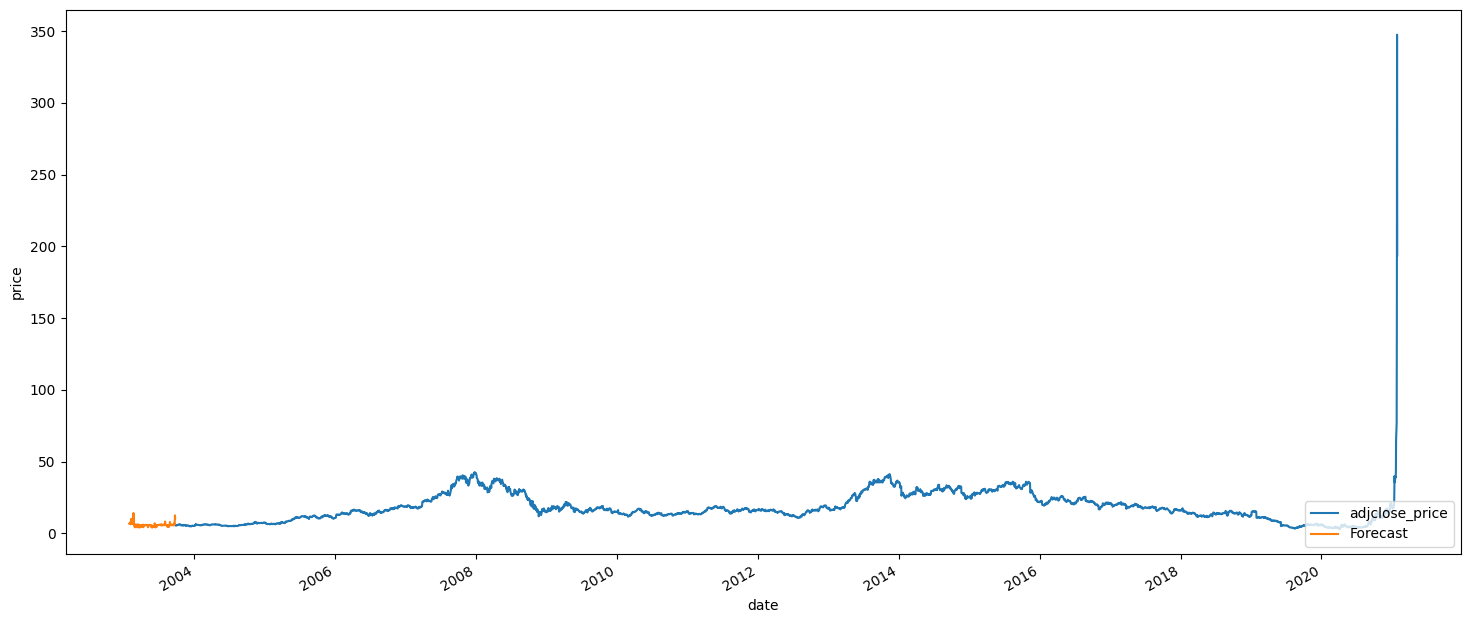

In [ ]:
plt.figure(figsize=(18, 8))
df['adjclose_price'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('date')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(18, 8)): This line creates a new figure with a specific size of 18 inches in width and 8 inches in height. The figsize parameter is used to specify the dimensions of the figure.

df['adjclose_price'].plot(): This line plots the 'adjclose_price' column from the DataFrame df, representing the actual prices over time.

df['Forecast'].plot(): This line plots the 'Forecast' column from the DataFrame df, representing the forecasted prices over time.

plt.legend(loc=4): This line adds a legend to the plot, which displays labels for the plotted lines. The loc=4 parameter specifies the position of the legend in the bottom-right corner of the plot.

plt.xlabel('date'): This line sets the label for the x-axis as 'date'.

plt.ylabel('price'): This line sets the label for the y-axis as 'price'.

plt.show(): This line displays the plot on the screen.

In summary, the code creates a plot showing the actual prices (adjclose_price) and the forecasted prices (Forecast) over time. The x-axis represents the date, and the y-axis represents the price. The plot allows for visual comparison between the actual and forecasted prices.



The color orange is set for the forecasted data.

## Clustering

<ipython-input-27-2ff176d9cd33>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


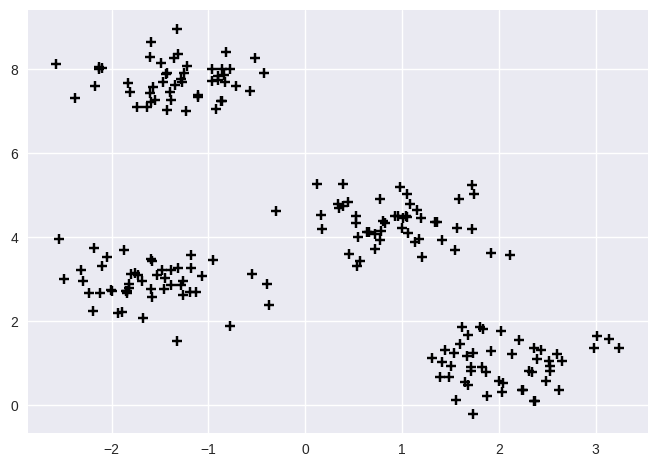

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('seaborn')
x, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5,shuffle=True, random_state=0)
plt.scatter(x[:, 0], x[:, 1], c='k', marker='+', s=50)
plt.show()


In [ ]:
y

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

**1.1 K-means**
1- Randomly select centroids (center of cluster) for each cluster.
2- Calculate the distance of all data points to the centroids.
3- Assign data points to the closest cluster.
4- Find the new centroids of each cluster by taking the mean of all data points in the cluster.
5- Repeat steps 2,3 and 4 until all points converge and cluster centers stop moving

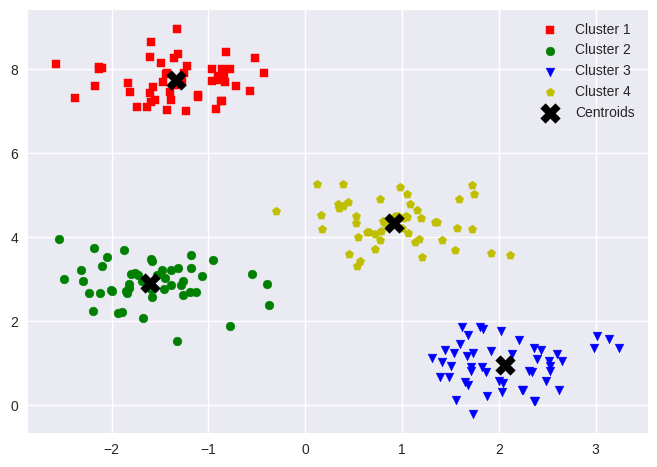

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
y_km = km.fit_predict(x)
plt.scatter(x[y_km==0, 0], x[y_km==0, 1], s=40, c='r', marker='s',label='Cluster 1')
plt.scatter(x[y_km==1, 0], x[y_km==1, 1], s=40, c='g', marker='o',label='Cluster 2')
plt.scatter(x[y_km==2, 0], x[y_km==2, 1], s=40, c='b', marker='v',label='Cluster 3')
plt.scatter(x[y_km==3, 0], x[y_km==3, 1], s=40, c='y', marker='p',label='Cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200,marker='X', c='k', label='Centroids')
plt.legend(scatterpoints=1)
plt.show()


**The Elbow Method**
Theorem: if k increases, the within-cluster SSE (“distortion”) will decrease.
Inertia is calculated by measuring the distance between each data point and its centroid.

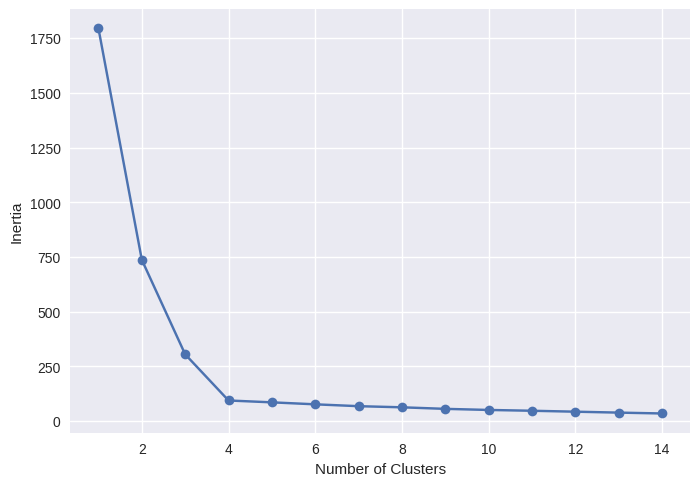

In [ ]:
inertias = []
for i in range(1, 15):
  km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
  km.fit(x)
  inertias.append(km.inertia_)

plt.plot(range(1,15), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Another example for KMeans

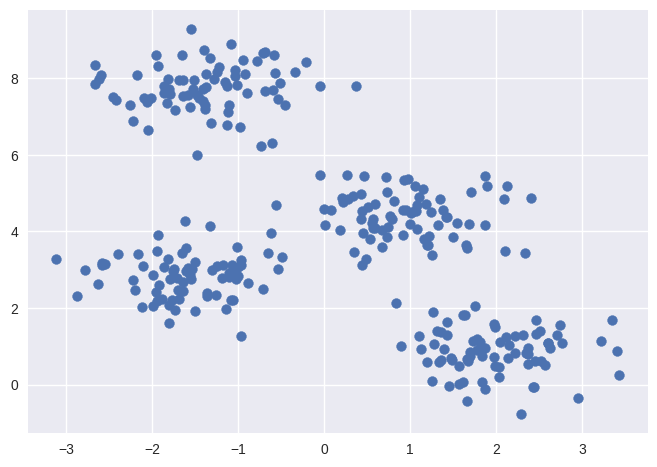

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60,
random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

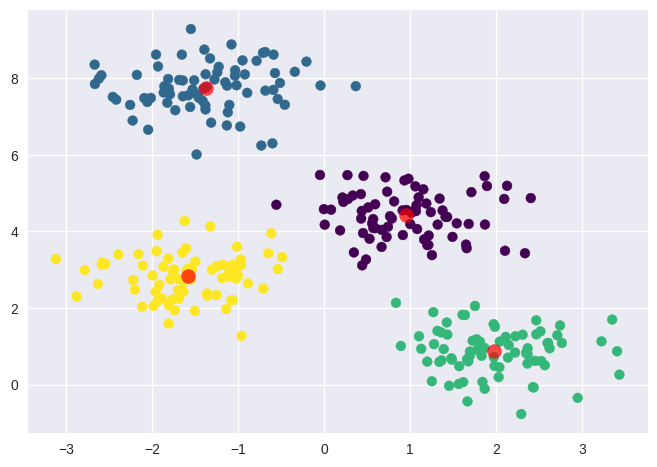

In [ ]:
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
pusat = kmeans.cluster_centers_
plt.scatter(pusat[:, 0], pusat[:, 1], c='red', s=100, alpha=0.7);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

In [ ]:
inersia = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inersia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

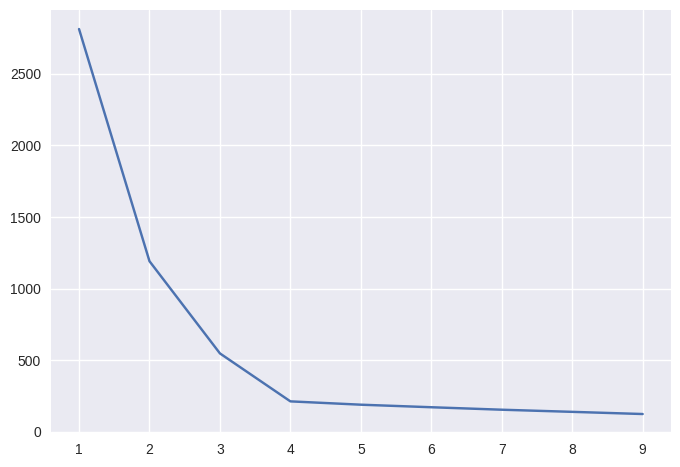

In [ ]:
plt.plot(range(1,10),inersia)
plt.show()

KMean6 with 6 cluster

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


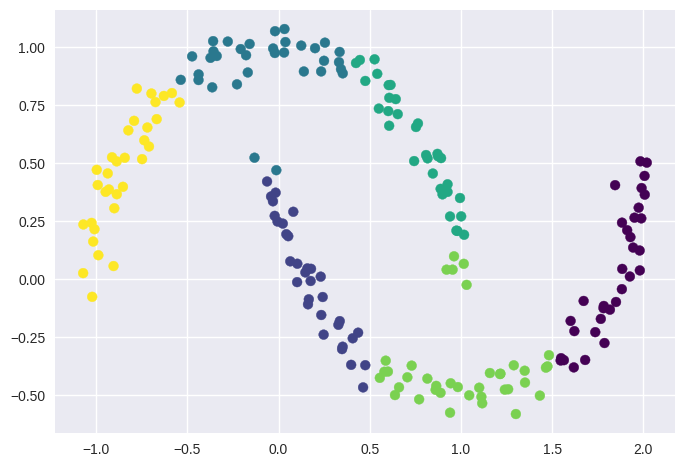

In [ ]:
label = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=label, s=50, cmap='viridis');

**Spectral Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


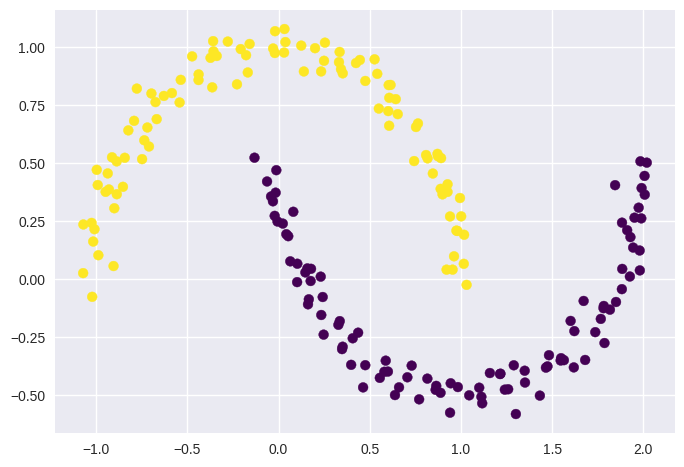

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**DBScan**

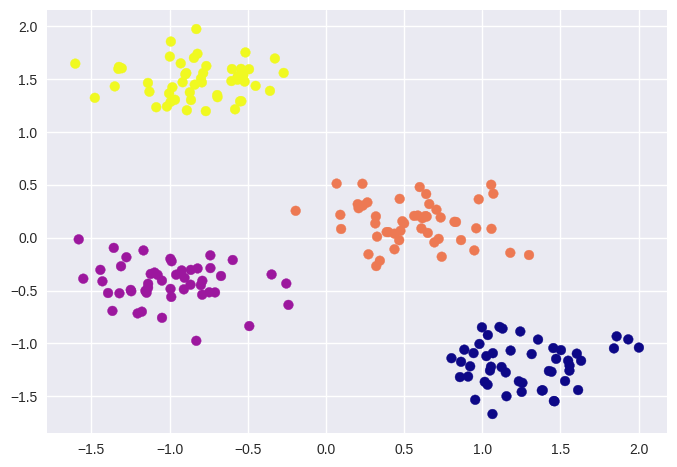

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=3)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()


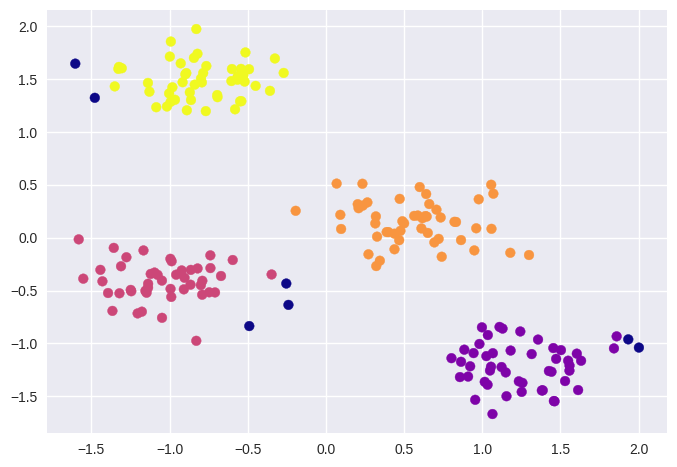

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=10)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()
